# Análise dataset Pokémon Go

In [2]:
#install.packages('ggplot2')
library(ggplot2) # Data visualization
# install.packages('plyr')
library(plyr)

In [3]:
#Lendo o dataset
data = read.csv('300k.csv')

In [124]:
# levels(data$continent)
# subset(data[,c('city', 'continent_fixed')], continent=='Indian')
# data[1:30, c('city', 'continent_fixed')]

In [125]:
#Limpeza Continents
data$continent_fixed = data$continent
levels(data$continent_fixed) = list(
                                America=c('America/Argentina','America/Indiana','America/Kentucky'),
                                Africa=c('Africa'),
                                Asia=c('Asia'),
                                Oceania=c('Atlantic', 'Australia'),
                                Europe=c('Europe', 'Indian', 'Pacific')
)

In [96]:
# Medidas resumo
#Média, freq e quantis
summary(data)

   pokemonId         latitude        longitude      
 Min.   :  1.00   Min.   :-42.98   Min.   :-159.33  
 1st Qu.: 16.00   1st Qu.: 33.81   1st Qu.: -90.24  
 Median : 21.00   Median : 42.25   Median : -71.12  
 Mean   : 45.32   Mean   : 38.77   Mean   : -35.70  
 3rd Qu.: 69.00   3rd Qu.: 49.48   3rd Qu.:  12.57  
 Max.   :149.00   Max.   : 68.44   Max.   : 175.62  
                                                    
           appearedLocalTime                            X_id       
 2016-09-06T14:56:22:   146   MjA0MDA1MzgyMjQ5NDg0NDkz    :     1  
 2016-09-04T11:54:36:     8   MjA0MDA2NDkzNjUwMjUzMzgyMQ==:     1  
 2016-09-03T00:28:22:     7   MjA0MDA2Njg2MTA5MTYxMDQ5Mw==:     1  
 2016-09-03T00:28:36:     7   MjA0MDAwNzgyOTgxMjA0MjU3Mw==:     1  
 2016-09-03T09:11:41:     7   MjA0MDAxMTg4NDM1MjUzNzk4MQ==:     1  
 2016-09-03T09:57:25:     7   MjA0MDAxNDcwMjk2OTc3ODgyOQ==:     1  
 (Other)            :295839   (Other)                     :296015  
   cellId_90m         cellId_180

In [40]:
numeric_fields = data[, c(
                        'latitude', 
                       'longitude', 
                       'temperature', 
                       'windSpeed', 
                       'windBearing', 
                       'pressure', 
                       'population_density', 
                       'gymDistanceKm'
                     )]
# Desvio padrão
apply(numeric_fields, 2, sd)

latitude          longitude        temperature          windSpeed 
         17.029203          67.398336           6.193089           4.175102 
       windBearing           pressure population_density      gymDistanceKm 
         99.942247           5.633861        1913.710175          18.646146

In [58]:
# Correlações
correlations = cor(numeric_fields)
subset(as.data.frame(as.table(correlations)), Var1 != Var2 & abs(Freq) > 0.2) # Nenhuma correlação notável

,Var1,Var2,Freq
3,temperature,latitude,-0.2202821
17,latitude,temperature,-0.2202821
38,pressure,windBearing,-0.2425995
45,windBearing,pressure,-0.2425995


In [17]:
topCities

Var1,Freq
New_York,54177
Chicago,32046
Prague,28000
Los_Angeles,22108
London,19094
Rome,15883
Mexico_City,12672
Paris,11210
Stockholm,9786
Zurich,6563


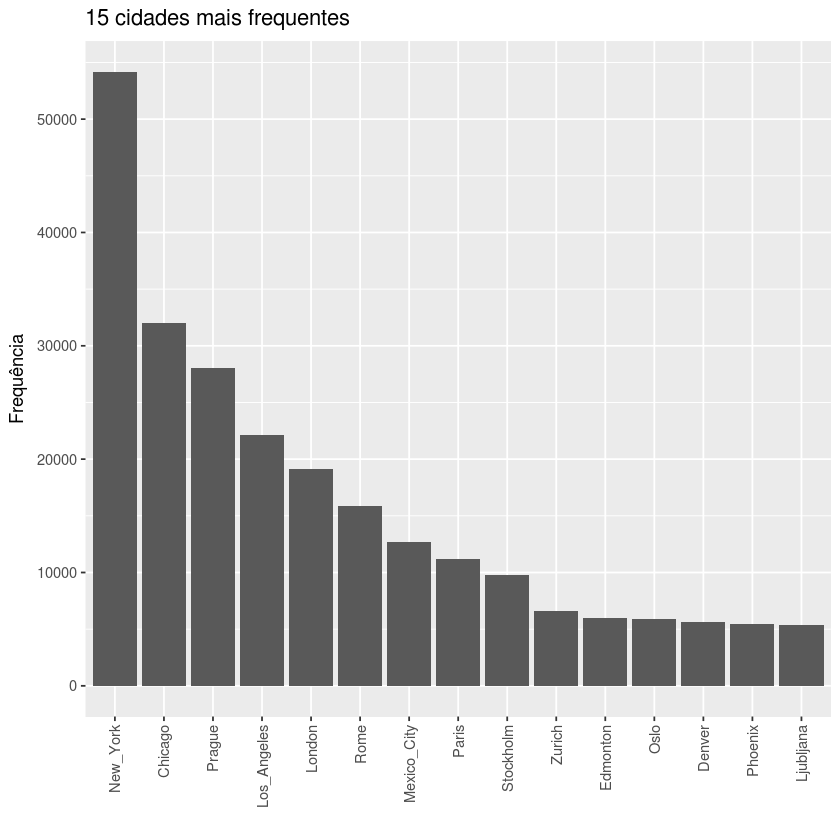

In [109]:
## Cidades mais frequentes
citiesFreq = table(data$city);
topCities = as.data.frame(sort(citiesFreq, decreasing=TRUE)[1:15]);

ggplot(data=topCities, aes(x=Var1,y=Freq)) +
      coord_cartesian() +      
      geom_bar(position="identity", stat="identity") + 
      scale_y_continuous(breaks = seq(0, 60000, by = 10000)) + 
      ggtitle("15 cidades mais frequentes") + 
      
      xlab("") +
      ylab("Frequência") +
      theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))

In [1]:
# Continentes
continentFreq = table(data$continent_fixed);
continents = as.data.frame(sort(continentFreq, decreasing=TRUE));

ggplot(data=continents, aes(x=Var1,y=Freq)) +
      coord_cartesian() +      
      geom_bar(position="dodge", stat="identity") + 
      ggtitle("Frequência por continente") + 
      xlab("Continente") +
      ylab("Frequência")

ERROR: Error in data$continent_fixed: object of type 'closure' is not subsettable


In [153]:
#Tipos de terreno
terr_cont = as.data.frame(
            table(data$continent_fixed, data$terrainType))
colnames(terr_cont) = c('country', 'terrain', 'freq');
terr_cont$terrain = revalue(sapply(terr_cont$terrain, toString), c(
                                            "0"="Water",
                                            "1"="Evergreen Needleleaf forest",
                                            "2"="Evergreen Broadleaf forest",
                                            "3"="Deciduous Needleleaf forest",
                                            "4"="Deciduous Broadleaf forest",
                                            "5"="Mixed forest",
                                            "6"="Closed shrublands",
                                            "7"="Open shrublands",
                                            "8"="Woody savannas",
                                            "9"="Savannas",
                                            "10"="Grasslands",
                                            "11"="Permanent wetlands",
                                            "12"="Croplands",
                                            "13"="Urban and built-up",
                                            "14"="Cropland/Natural vegetation mosaic",
                                            "15"="Snow and ice",
                                            "16"="Barren or sparsely vegetated",
                                            "254"="Unclassified",
                                            "255"="Fill Value"
));
terr_cont = terr_cont[with(terr_cont, order(country, -freq)),] #Distribuição de terrenos pelos continentes
#TODO adicionar porcentagem em relação ao total do país
terr_cont[match(unique(terr_cont$country), terr_cont$country),] #Terreno mais frequente de cada continente

The following `from` values were not present in `x`: 3, 6, 15, 254, 255


,country,terrain,freq
56,America,Urban and built-up,73795
42,Africa,Grasslands,42
58,Asia,Urban and built-up,9329
59,Oceania,Urban and built-up,2131
60,Europe,Urban and built-up,44176


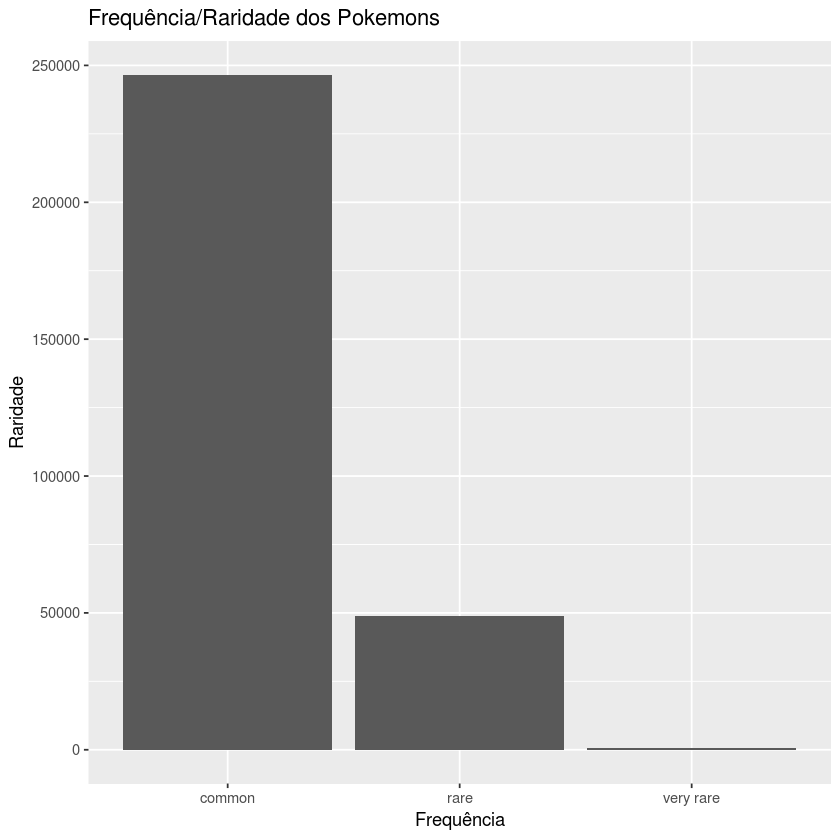

In [161]:
#Classificação entre pokemons raros, bem raros e extremamente raros
#Classificação retirada dos jogos da franquia principal
#Raros
data$isRare <- ifelse(
    data$pokemonId == 1 |
    data$pokemonId == 2 |
    data$pokemonId == 3 |
    data$pokemonId == 4 |
    data$pokemonId == 5 |
    data$pokemonId == 6 |
    data$pokemonId == 7 |
    data$pokemonId == 8 |
    data$pokemonId == 9 |
    data$pokemonId == 25 |
    data$pokemonId == 26 |
    data$pokemonId == 27 |
    data$pokemonId == 28 |
    data$pokemonId == 35 |
    data$pokemonId == 36 |
    data$pokemonId == 37 |
    data$pokemonId == 38 |
    data$pokemonId == 39 |
    data$pokemonId == 50 |
    data$pokemonId == 51 |
    data$pokemonId == 52 |
    data$pokemonId == 53 |
    data$pokemonId == 54 |
    data$pokemonId == 55 |
    data$pokemonId == 56 |
    data$pokemonId == 63 |
    data$pokemonId == 64 |
    data$pokemonId == 65 |
    data$pokemonId == 66 |
    data$pokemonId == 67 |
    data$pokemonId == 68 |
    data$pokemonId == 72 |
    data$pokemonId == 73 |
    data$pokemonId == 74 |
    data$pokemonId == 75 |
    data$pokemonId == 76 |
    data$pokemonId == 77 |
    data$pokemonId == 78 |
    data$pokemonId == 79 |
    data$pokemonId == 80 |
    data$pokemonId == 81 |
    data$pokemonId == 82 |
    data$pokemonId == 86 |
    data$pokemonId == 87 |
    data$pokemonId == 90 |
    data$pokemonId == 91 |
    data$pokemonId == 95 |
    data$pokemonId == 100 |
    data$pokemonId == 101 |
    data$pokemonId == 102 |
    data$pokemonId == 103 |
    data$pokemonId == 104 |
    data$pokemonId == 105 |
    data$pokemonId == 109 |
    data$pokemonId == 110 |
    data$pokemonId == 111 |
    data$pokemonId == 112 |
    data$pokemonId == 114 |
    data$pokemonId == 116 |
    data$pokemonId == 117 |
    data$pokemonId == 118 |
    data$pokemonId == 119 |
    data$pokemonId == 123 |
    data$pokemonId == 124 |
    data$pokemonId == 125 |
    data$pokemonId == 126 |
    data$pokemonId == 128 |
    data$pokemonId == 134 |
    data$pokemonId == 135 |
    data$pokemonId == 136 |
    data$pokemonId == 138 |
    data$pokemonId == 139 |
    data$pokemonId == 140 |
    data$pokemonId == 141 |
    data$pokemonId == 143 |
    data$pokemonId == 147 |
    data$pokemonId == 148 |
    data$pokemonId == 149,
  TRUE, FALSE)

# Muito raros
data$isVeryRare <- ifelse(
    data$pokemonId == 88 |
    data$pokemonId == 89 |
    data$pokemonId == 106 |
    data$pokemonId == 107 |
    data$pokemonId == 108 |
    data$pokemonId == 113 |
    data$pokemonId == 130 |
    data$pokemonId == 137 |
    data$pokemonId == 142 |
    data$pokemonId == 83 |
    data$pokemonId == 132 |
    data$pokemonId == 144 |
    data$pokemonId == 145 |
    data$pokemonId == 146 |
    data$pokemonId == 150 |
    data$pokemonId == 151 |
    data$pokemonId == 115 |
    data$pokemonId == 122 |
    data$pokemonId == 131,
  TRUE, FALSE)

data$classif <- ifelse(data$isRare == TRUE, "rare", "NONE")
data$classif <- ifelse(data$isVeryRare == TRUE, "very rare", data$classif)
data$classif <- ifelse(data$classif == "NONE", "common", data$classif)

ggplot(data, aes(x=classif)) +
  geom_bar() + 
   ggtitle("Frequência/Raridade dos Pokemons") + 
      xlab("Frequência") +
      ylab("Raridade")

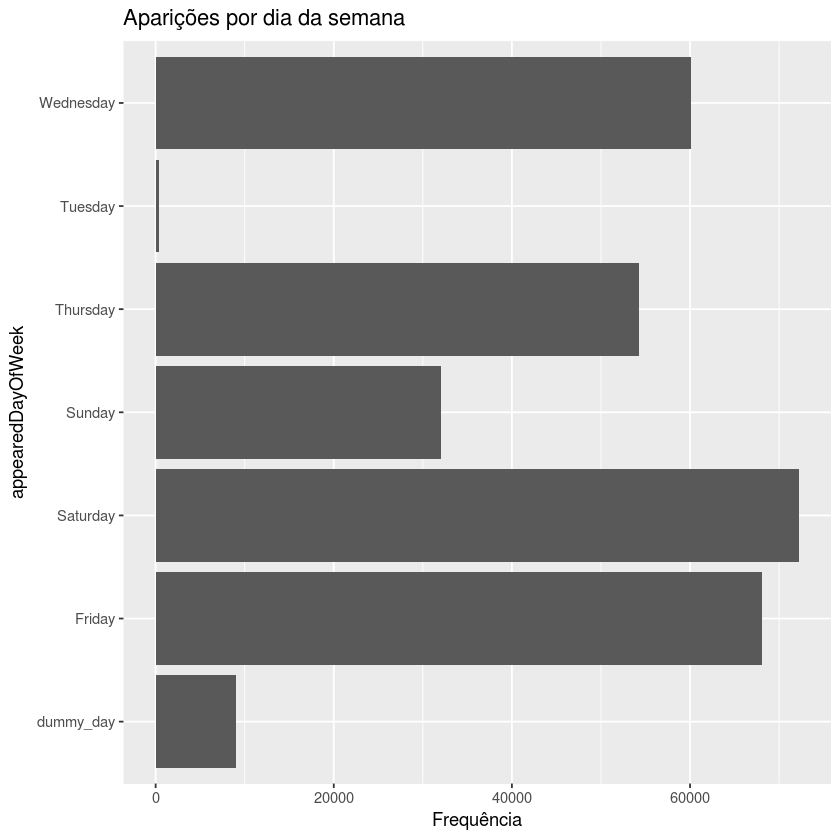

In [167]:
ggplot(data, aes(x=appearedDayOfWeek)) +
  geom_bar() +
  coord_flip() +
  ggtitle("Aparições por dia da semana") +
  ylab("Frequência")

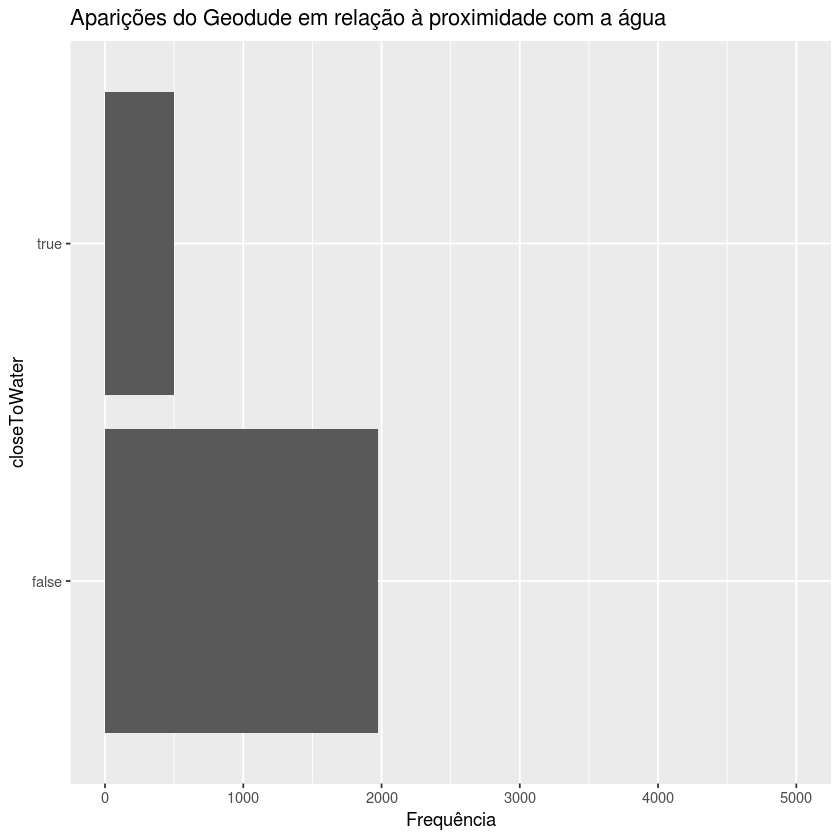

In [201]:
# Teste correlação do Geodude (Pokemon tipo pedra/terra) com proximidade com a água
id_geodude = 74
ggplot(subset(data, data$pokemonId == id_geodude), aes(x=closeToWater)) +
    coord_flip() +  
    geom_bar() +
    scale_y_continuous(limits=c(0,5000)) +
    ggtitle("Aparições do Geodude em relação à proximidade com a água") +
    ylab("Frequência")

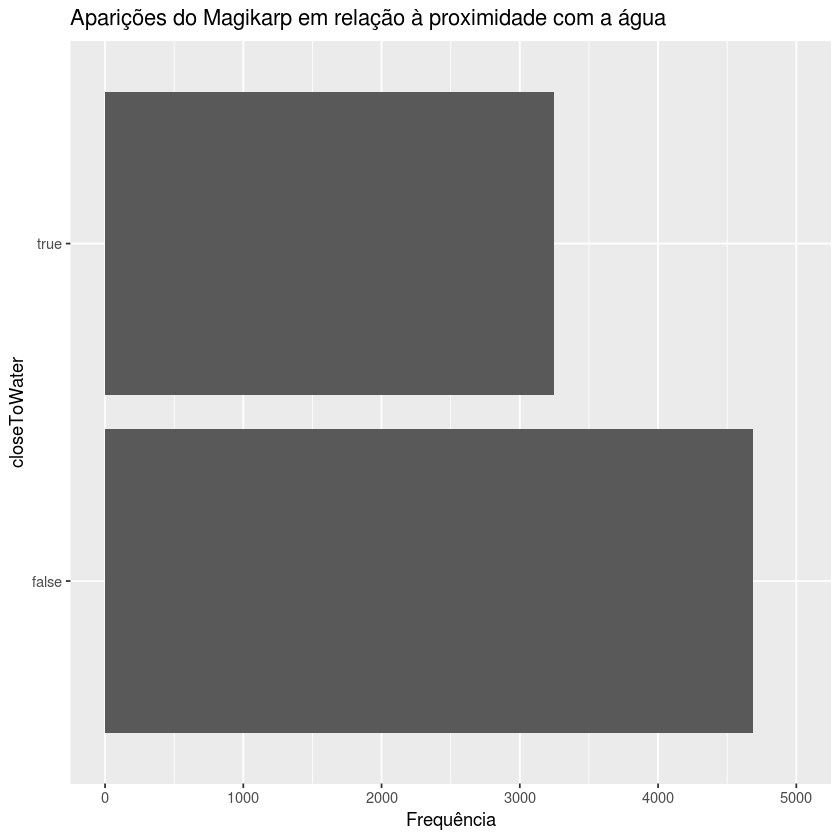

In [205]:
# Teste correlação do Magikarp (Pokemon tipo água) com proximidade com a água
id_magikarp = 129
ggplot(subset(data, data$pokemonId == id_magikarp), aes(x=closeToWater)) +
    coord_flip() +  
    geom_bar() +
    scale_y_continuous(limits=c(0,5000)) +
    ggtitle("Aparições do Magikarp em relação à proximidade com a água") +
    ylab("Frequência")

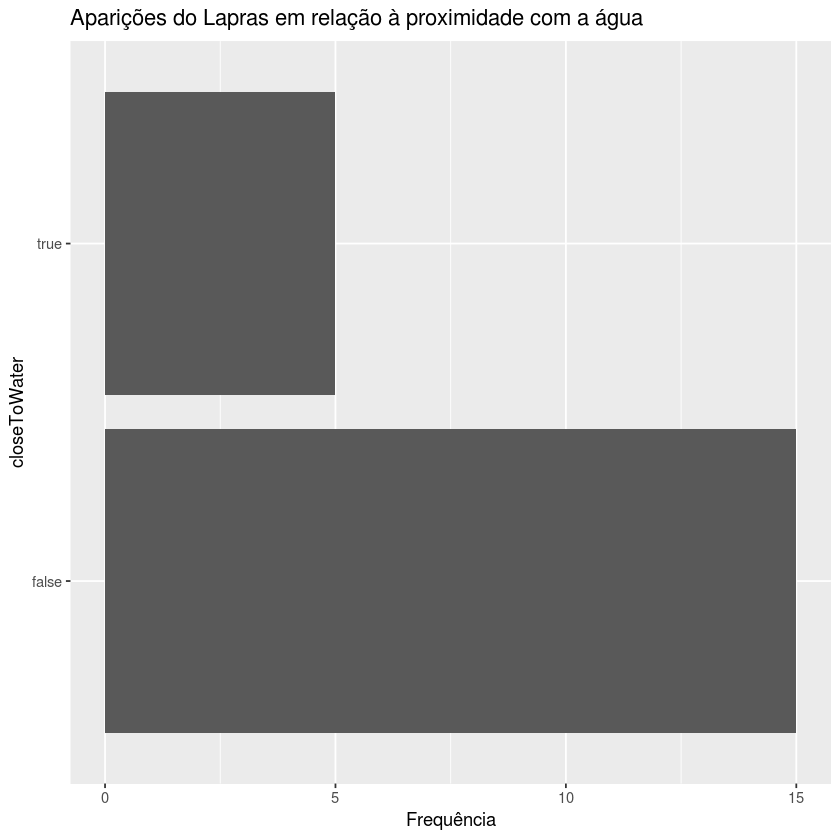

In [207]:
# Teste correlação do Lapras (Pokemon tipo água) com proximidade com a água
id_lapras = 131
ggplot(subset(data, data$pokemonId == id_lapras), aes(x=closeToWater)) +
    coord_flip() +  
    geom_bar() +
    ggtitle("Aparições do Lapras em relação à proximidade com a água") +
    ylab("Frequência")